In [57]:
import pandas_datareader as web
import ta, datetime
import numpy as np

In [58]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 9, 1)
df = web.DataReader("INFY.NS", 'yahoo', start, end)

In [72]:
round(3000/30.7)

98

In [64]:
df['DReturns'] = ((df['Close']-df['Open'])/df['Open'])
lcondition1 = (df['Low'].shift(1) > df['Low'].shift(2)) & (df['Low'].shift(2) < df['Low'].shift(3))
lcondition2 = df['High'].shift(1) > df['High'].shift(2)
lcondition3 = (df['Close'].shift(1) > df['Open'].shift(1)) & (df['Close'].shift(2) > df['Open'].shift(2))
lcondition4 = (df['Open'] < df['High'].shift(1)) & (df['Open'] > df['Low'].shift(1))
df['Long'] = np.where(lcondition1 & lcondition2 & lcondition3 & lcondition4,1,0)



In [65]:
scondition1 = (df['High'].shift(1) < df['High'].shift(2)) & (df['High'].shift(2) > df['High'].shift(3))
scondition2 = df['Low'].shift(1) < df['Low'].shift(2)
scondition3 = (df['Close'].shift(1) < df['Open'].shift(1)) & (df['Close'].shift(2) < df['Open'].shift(2))
scondition4 = (df['Open'] < df['High'].shift(1)) & (df['Open'] > df['Low'].shift(1))
df['Short'] = np.where(scondition1 & scondition2 & scondition3 & scondition4,-1,0)

In [66]:
strategyReturns = df.Long * df.DReturns
strategyReturns1 = df.Short * df.DReturns

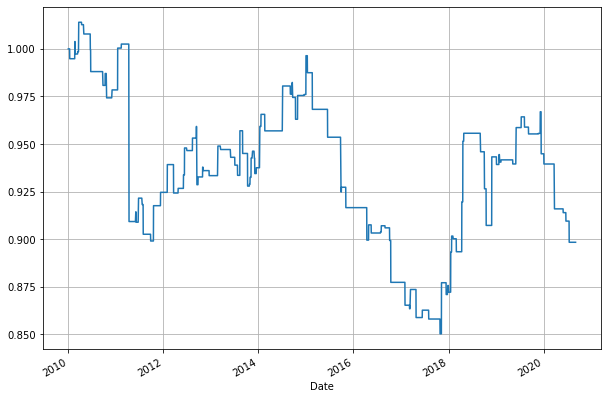

In [67]:
import matplotlib as plt
%matplotlib inline

(strategyReturns+1).cumprod().plot(figsize=(10,7),grid=True)

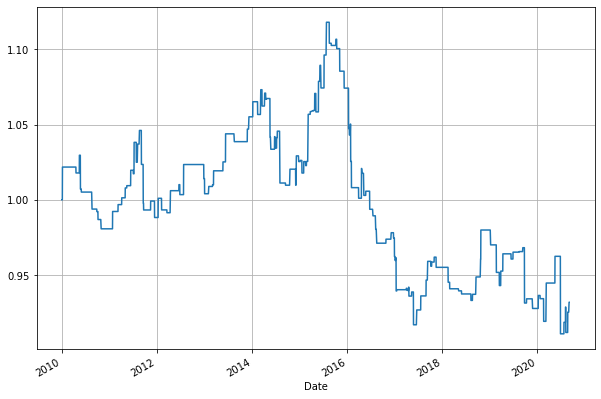

In [68]:
import matplotlib as plt
%matplotlib inline

(strategyReturns1+1).cumprod().plot(figsize=(10,7),grid=True)

ma10 = ta.trend.SMAIndicator(df['Close'], 20).sma_indicator()
ma2 = ta.trend.SMAIndicator(df['Close'], 2).sma_indicator()
ma5 = ta.trend.SMAIndicator(df['Close'], 5).sma_indicator()
#df['highc50'] = df['Adj Close'][-50:].idxmax() 
#df['lowc50'] = df['Adj Close'][-50:].idxmin()
df['ma10'] = ma10.sort_values(ascending=True)
df['ma2'] = ma2.sort_values(ascending=True)
df['ma5'] = ma5.sort_values(ascending=True)

#drop 50 records 
#df =  df.iloc[30:]
df.dropna()

C:\Users\ravi\anaconda3\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(
C:\Users\ravi\anaconda3\lib\site-packages\empyrical\stats.py:1525: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs(np.percentile(returns, 95)) / \


Start date,2018-01-01
End date,2020-09-01
Total months,31
,Backtest
Annual return,0.5%
Cumulative returns,1.3%
Annual volatility,5.3%
Sharpe ratio,0.12
Calmar ratio,0.11
Stability,0.37
Max drawdown,-4.2%


C:\Users\ravi\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ravi\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ravi\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\ravi\

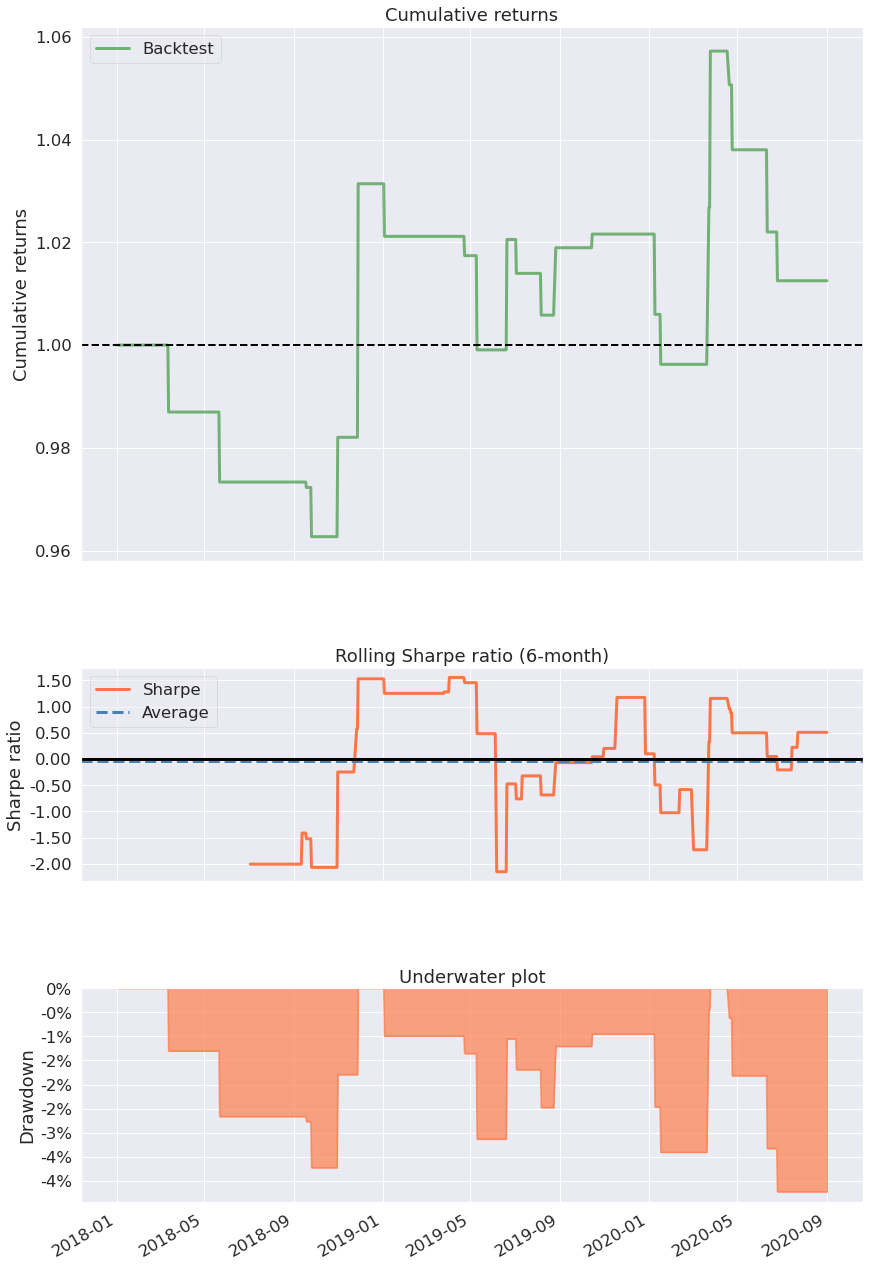

In [20]:
import pyfolio as pf
pf.create_simple_tear_sheet(strategyReturns)